## Imports

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from talib import RSI, BBANDS, MACD

In [ ]:
sns.set_style('whitegrid')
idx = pd.IndexSlice

## Data Retrieval

In [ ]:
DATA_STORE = '../data/assets.h5'

In [ ]:
with pd.HDFStore(DATA_STORE) as store:
    data = (store['alpaca/tesla/prices']
            .loc[idx['2018':'2023', 'TSLA'],
                 ['open', 'high', 'low', 'close', 'volume']]
            .unstack('symbol')
            .swaplevel(axis=1)
            .loc[:, 'TSLA'])

In [ ]:
data.info()

In [ ]:
display(data.head())
display(data.tail())

## Compute Bollinger Bands

KeyboardInterrupt: 

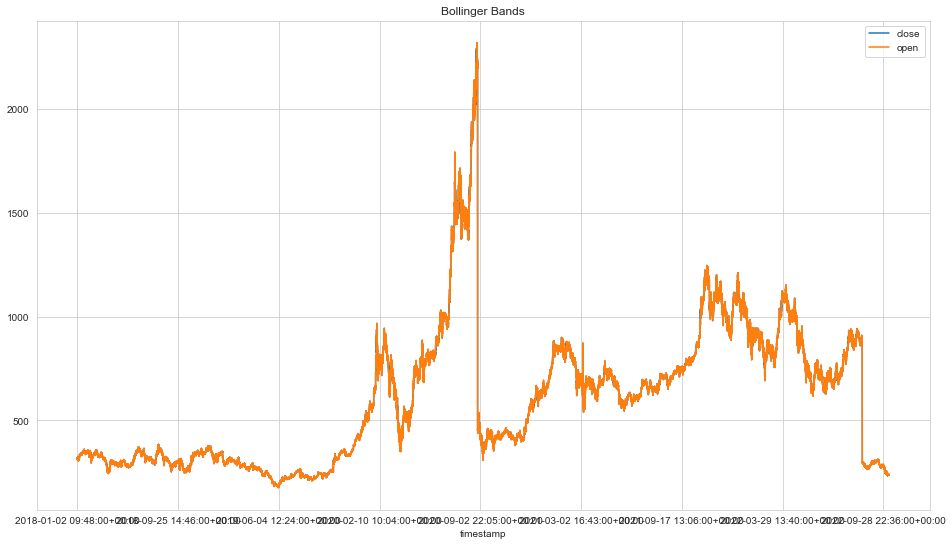

In [8]:
# Compute Bollinger Bands
up, mid, low = BBANDS(data.close, timeperiod=21, nbdevup=2, nbdevdn=2, matype=0)

# Visualization 
data[['close', 'open']].plot(figsize=(16, 9), title='Bollinger Bands')
plt.plot(up, label='Upper Band')
plt.plot(mid, label='Middle Band')
plt.plot(low, label='Lower Band')
plt.legend(loc='best')
plt.show()

In [ ]:
# Save plot of Bollinger Bands as jpeg in the images folder
plt.savefig('../images/bollinger_bands_tesla.jpeg')

## Compute Relative Strength Index

In [ ]:
rsi = RSI(data.close, timeperiod=14)

In [ ]:
# Compute RSI index
rsi = RSI(data.close, timeperiod=14)

# Plot RSI
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(data.index, rsi, label='RSI')
ax.axhline(70, color='red')
ax.axhline(30, color='green')
ax.set_ylabel('RSI')
ax.legend(loc='best')
ax.grid(True)
plt.show()

In [ ]:
# Save RSI plot as jpeg
plt.savefig('../images/rsi_tesla.jpeg')

## Moving Average Convergence/Divergence

In [ ]:
macd, macdsignal, macdhist = MACD(data.close, fastperiod=12, slowperiod=26, signalperiod=9)

In [ ]:
macd_data = pd.DataFrame({'TSLA': data.close, 'TSLA': macd, 'MACD Signal': macdsignal, 'MACD History': macdhist})

fig, axes= plt.subplots(nrows=2, figsize=(15, 8))
macd_data.TSLA.plot(ax=axes[0])
macd_data.drop('TSLA', axis=1).plot(ax=axes[1])
fig.tight_layout()
sns.despine();

In [ ]:
# Save MCA plot as jpeg
plt.savefig('../images/macd_tesla.jpeg')

## Plot Result

In [ ]:
data = pd.DataFrame({'TSLA': data.close, 'BB Up': up, 'BB Mid': mid, 'BB down': low, 'RSI': rsi, 'MACD': macd})

In [ ]:
fig, axes= plt.subplots(nrows=3, figsize=(15, 10), sharex=True)
data.drop(['RSI', 'MACD'], axis=1).plot(ax=axes[0], lw=1, title='Bollinger Bands')
data['RSI'].plot(ax=axes[1], lw=1, title='Relative Strength Index')
axes[1].axhline(70, lw=1, ls='--', c='k')
axes[1].axhline(30, lw=1, ls='--', c='k')
data.MACD.plot(ax=axes[2], lw=1, title='Moving Average Convergence/Divergence', rot=0)
axes[2].set_xlabel('')
fig.tight_layout()
sns.despine();

In [ ]:
# Save combined plot as jpeg
plt.savefig('../images/combined_tesla.jpeg')